In [11]:
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import pydot
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import export_graphviz

In [12]:
import pandas as pd# Lire les données et afficher les 5 premières lignes
features = pd.read_csv('CarteBancaire.csv')
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print('The shape of our features is:', features.shape)


('The shape of our features is:', (284807, 31))


In [14]:
# Statistiques descriptives pour chaque colonne
features.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
# Encodage des données à l'aide de pandas get_dummies
features = pd.get_dummies(features)# Afficher les 5 premières lignes des 12 dernières colonnes
features.iloc[:,5:].head(5)

,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
# Utilisez numpy pour convertir en tableaux
import numpy as np# Les étiquettes sont les valeurs que nous voulons prédire
labels = np.array(features['Class'])# Supprimer les étiquettes des fonctionnalités
# l'axe 1 fait référence aux colonnes
features= features.drop('Class', axis = 1)# Enregistrement des noms de fonctionnalités pour une utilisation ultérieure
feature_list = list(features.columns)# Convertir en tableau numpy
features = np.array(features)

In [20]:
# Utilisation de Skicit-learn pour diviser les données en ensembles  et de test
from sklearn.model_selection import train_test_split# Divisez les données en ensembles d'apprentissage et de test
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [21]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (213605, 30))
('Training Labels Shape:', (213605,))
('Testing Features Shape:', (71202, 30))
('Testing Labels Shape:', (71202,))


In [22]:
baseline_preds = test_features[:, feature_list.index('Amount')]# Erreurs de référence et affichage de l'erreur de référence moyenne
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

('Average baseline error: ', 87.27)


In [23]:
# Importation de modèle que nous utilisons
from sklearn.ensemble import RandomForestRegressor# Modèle d'instanciation avec 1 arbre de décision
rf = RandomForestRegressor(n_estimators = 1, random_state = 42)# Former le modèle sur les données d'entraînement
rf.fit(train_features, train_labels);

In [13]:
# Utiliser la méthode de prédiction de la forêt sur les données de test
predictions = rf.predict(test_features)# Calcule des erreurs absolues
errors = abs(predictions - test_labels)# Afficher l'erreur absolue moyenne 
print('Mean Absolute Error:', round(np.mean(errors), 2))

('Mean Absolute Error:', 0.0)


In [24]:
forest=RandomForestClassifier(n_estimators=100,max_depth=10,max_features=2)
model=forest.fit(train_features,train_labels)
pred= forest.predict(test_features)

print("accuracy {:.3f}".format(accuracy_score(test_labels, pred)))

accuracy 0.999


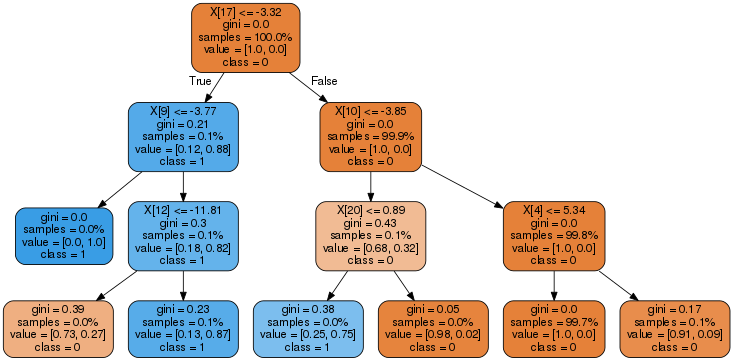

In [25]:
forest=RandomForestClassifier(n_estimators=100,max_depth=3)
model=forest.fit(train_features,train_labels)
pred= forest.predict(test_features)


estimator = model.estimators_[1]

from sklearn.tree import export_graphviz
# Exporter en tant que fichier dot
export_graphviz(estimator, out_file='tree.dot', 
                class_names = ['0','1'],
                rounded = True, proportion = True, 
                precision = 2, filled = True)

# Convertir en png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=60'])

from IPython.display import Image
Image(filename = 'tree.png')

In [27]:
# Obtenez des importances de fonctionnalités numériques
importances = list(rf.feature_importances_)# Liste des tuples avec variable et importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Trier les importances de fonctionnalités par les plus importantes en premier
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Afficher la fonctionnalité et les importances
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair)) ;

Variable: V17                  Importance: 0.55
Variable: V14                  Importance: 0.12
Variable: V10                  Importance: 0.07
Variable: V3                   Importance: 0.05
Variable: V26                  Importance: 0.04
Variable: V1                   Importance: 0.02
Variable: V4                   Importance: 0.02
Variable: Amount               Importance: 0.02
Variable: V5                   Importance: 0.01
Variable: V7                   Importance: 0.01
Variable: V12                  Importance: 0.01
Variable: V13                  Importance: 0.01
Variable: V15                  Importance: 0.01
Variable: V16                  Importance: 0.01
Variable: V19                  Importance: 0.01
Variable: V23                  Importance: 0.01
Variable: V24                  Importance: 0.01
Variable: V25                  Importance: 0.01
Variable: V27                  Importance: 0.01
Variable: V28                  Importance: 0.01
Variable: Time                 Importanc

In [28]:
forest=RandomForestClassifier(n_estimators=10,max_depth=10,max_features=2)
model=forest.fit(train_features,train_labels)
pred= forest.predict(test_features)

print("accuracy {:.3f}".format(accuracy_score(test_labels, pred)))

accuracy 0.999


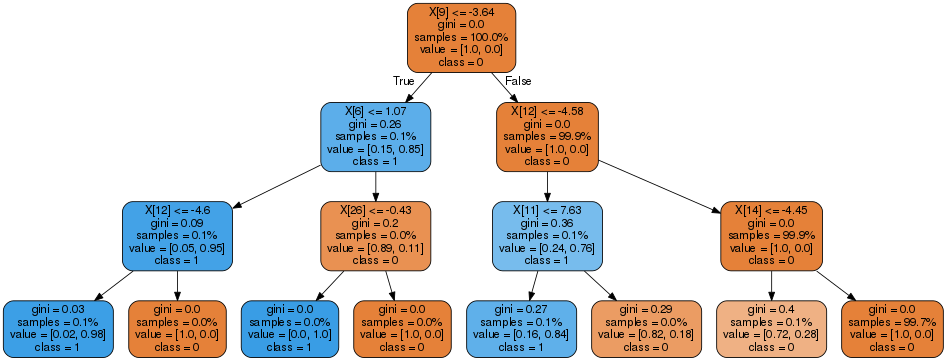

In [29]:
forest=RandomForestClassifier(n_estimators=10,max_depth=3)
model=forest.fit(train_features,train_labels)
pred= forest.predict(test_features)


estimator = model.estimators_[1]

from sklearn.tree import export_graphviz
# Exporter en tant que fichier dot
export_graphviz(estimator, out_file='tree.dot', 
                class_names = ['0','1'],
                rounded = True, proportion = True, 
                precision = 2, filled = True)

# Convertir en png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=60'])

from IPython.display import Image
Image(filename = 'tree.png')

In [30]:
forest=RandomForestClassifier(n_estimators=50,max_depth=10,max_features=2)
model=forest.fit(train_features,train_labels)
pred= forest.predict(test_features)

print("accuracy {:.3f}".format(accuracy_score(test_labels, pred)))

accuracy 0.999


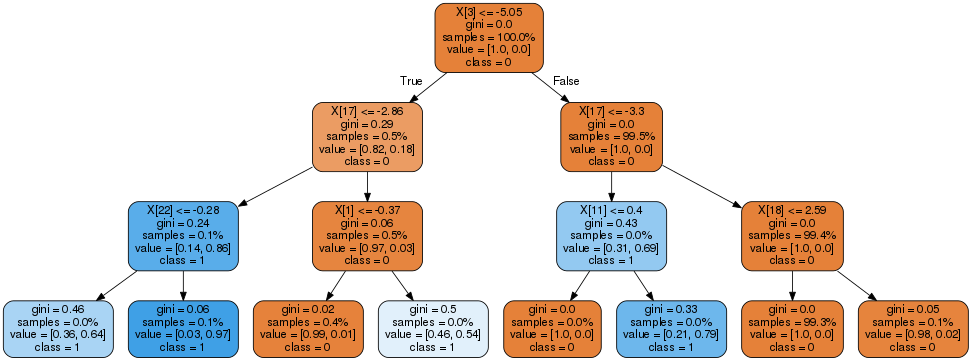

In [31]:
forest=RandomForestClassifier(n_estimators=50,max_depth=3)
model=forest.fit(train_features,train_labels)
pred= forest.predict(test_features)


estimator = model.estimators_[1]

from sklearn.tree import export_graphviz
# Exporter en tant que fichier dot
export_graphviz(estimator, out_file='tree.dot', 
                class_names = ['0','1'],
                rounded = True, proportion = True, 
                precision = 2, filled = True)

# Convertir en png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=60'])

from IPython.display import Image
Image(filename = 'tree.png')

In [35]:
forest=RandomForestClassifier(n_estimators=1,max_depth=10,max_features=2)
model=forest.fit(train_features,train_labels)
pred= forest.predict(test_features)

print("accuracy {:.3f}".format(accuracy_score(test_labels, pred)))

accuracy 0.999


In [ ]:
from sklearn.model_selection import GridSearchCV

 

n_estimators = np.arange(10,100,10)
max_depth = np.arange(10,30,5)
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5] 

 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
             min_samples_split = min_samples_split, 
            min_samples_leaf = min_samples_leaf)

 

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(train_features,train_labels)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 141.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 422.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 736.4min


In [ ]:
print("best max_depth", bestF.best_estimator_.get_params()['max_depth'])
print("best n_estimators", bestF.best_estimator_.get_params()['n_estimators'])
print("best min_samples_leaf", bestF.best_estimator_.get_params()['min_samples_leaf'])
print("max_features", bestF.best_estimator_.get_params()['min_samples_split'])
